# Workshop 2

## Student: Gerson Yarce Franco - 2221479

## What's expected?
I expect that you get the CSV files and create an ETL data pipeline to extract the information, 
transform, merge, and store (in a DB and in google drive as a CSV file). Also, you will display those data from the 
database in chart visualizations; remember, the data should be stored in a database, and your reports must come 
from the database, not the CSV file. 

Find a way to merge the two data sources in order to create an impressive dashboard with useful information 

### Goals


## Setup

### Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

from db.engine import engine
from core.config import settings
from utils.eda import (
    colors,
    start_bold,
    end_bold,
    get_max_count_values,
    get_min_count_values,
    plot_word_cloud,
    plot_counts,
    get_min_max_counts,
    plot_stacked_bar_from_combinations,
    get_color,
)

%matplotlib inline

## Loading Data

### Grammy Winners Data

In [2]:
GRAMMY_COLUMNS = ["year","title","published_at","updated_at","category","nominee","artist","workers","img","winner"]

In [3]:
grammy_winners_df  = pd.read_sql_table(
    settings.RAW_TABLE,
    con=engine,
    columns=GRAMMY_COLUMNS,
)

In [4]:
grammy_winners_df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


### Spotify Data

In [5]:
current_directory = os.getcwd()
csv_file_path = os.path.join(current_directory, 'data', 'spotify_dataset.csv')
csv_file_path

'/app/data/spotify_dataset.csv'

In [6]:
spotify_df = pd.read_csv(csv_file_path, sep=",")
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
spotify_df.shape

(114000, 21)

## EDA - Grammy Winners

### Initial Review

In [8]:
print(f"We have a dataset with {start_bold}{grammy_winners_df.shape[0]:,} entries{end_bold} with {start_bold}{grammy_winners_df.shape[1]:,} columns{end_bold} Let's take a look at them")

We have a dataset with 4,810 entries with 10 columns Let's take a look at them


In [9]:
grammy_winners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


### Univariate Exploring

#### Numerical Data

##### Year

Let's see the range of years this dataset covers.

In [10]:
covered_years = grammy_winners_df["year"].unique()
years_range = pd.Series(range(grammy_winners_df["year"].min(), grammy_winners_df["year"].max() + 1))
missing_years = years_range[~years_range.isin(covered_years)]
missing_years

Series([], dtype: int64)

In [11]:
print(f"""This dataset covers nominees from {start_bold}{grammy_winners_df["year"].min():,}{end_bold} until {start_bold}{grammy_winners_df["year"].max():,}{end_bold}
{start_bold}{len(covered_years)}{end_bold} Awards Ceremonies! Missing Years: {start_bold}{len(missing_years)}{end_bold}.
""")

This dataset covers nominees from 1,958 until 2,019
62 Awards Ceremonies! Missing Years: 0.



#### Binary Data

##### Winner

Reviewing this attribute we found an issue with the dataset, due that all of the entries are set as True meaning that all of the nominees werw winners when that can be true, after a further review this dataset is a version 3.0 an is where the error is present, in the version 2.0 of it has a more valid distribution.

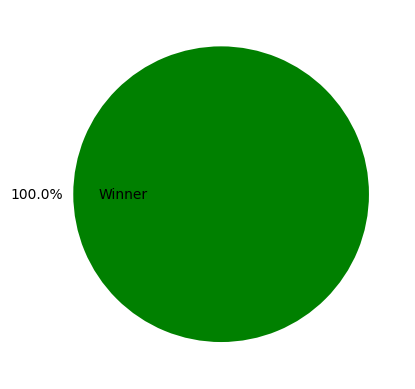

In [12]:
mapping = {0: 'Nominee', 1: 'Winner'}
winner_counts = grammy_winners_df['winner'].value_counts()
labels = [mapping[label] for label in winner_counts.index.tolist()]

colors_theme = colors[0:len(labels)]

_, ax = plt.subplots()
ax.pie(winner_counts, labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.5, colors=colors_theme)
plt.show()

#### Categorical Data

Most of the data is categorical so let's them:

##### Category

In [13]:
newline = "\n"

In [14]:
max_count_categories = get_max_count_values(grammy_winners_df, "category")
max_count = grammy_winners_df["category"].value_counts().max()

In [15]:
print(f"""There is {start_bold}{len(max_count_categories)}{end_bold} Awards categories that have been given: {start_bold}{max_count} time{'s' if max_count != 1 else ''}{end_bold}.
{newline.join([f"- {category}" for category in max_count_categories])}
""")

There is 1 Awards categories that have been given: 70 times.
- Song Of The Year



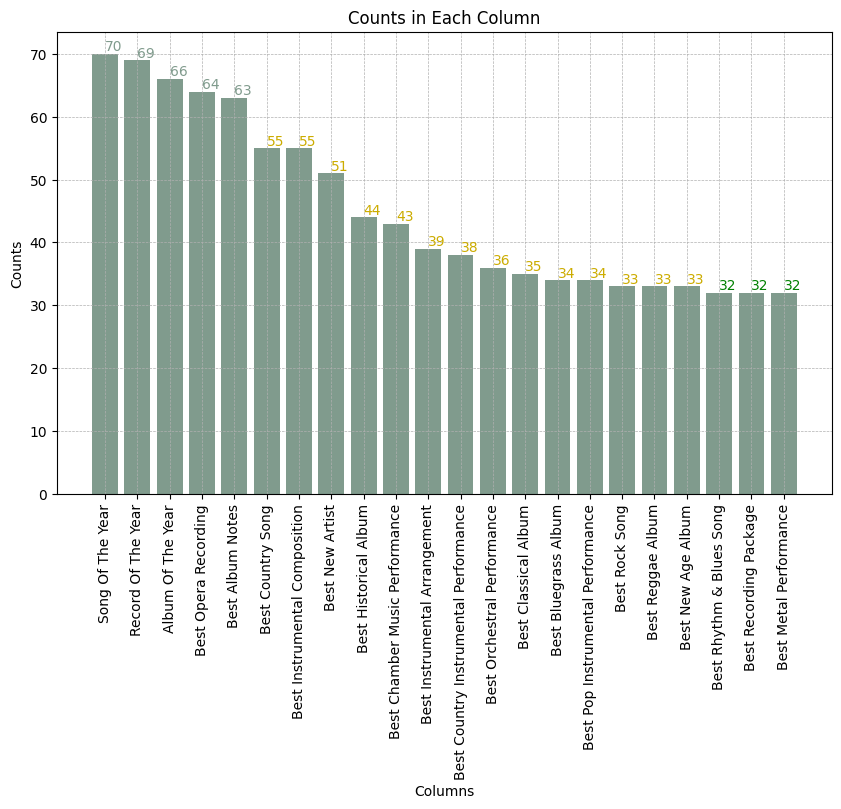

In [16]:
threshold = int(len(covered_years)/2)
filtered_categories = grammy_winners_df["category"].value_counts()
filtered_categories = filtered_categories[filtered_categories > threshold]
plot_counts(filtered_categories, len(covered_years), int(len(covered_years)/2 + 1))

In [17]:
min_count_categories = get_min_count_values(grammy_winners_df, "category")
min_count = grammy_winners_df["category"].value_counts().min()

In [18]:

print(f"""There is {start_bold}{len(min_count_categories)}{end_bold} Awards categories that have been given: {start_bold}{min_count} time{'s'[:min_count^1]}{end_bold}.
{newline.join([f"- {category}" for category in min_count_categories])}
""")

There is 224 Awards categories that have been given: 1 time.
- Best Latin Pop, Rock, Or Urban Album
- Best Regional Mexican Or Tejano Album
- Best Banda Or Norteño Album
- Best Instrumental Arrangement Accompanying A Vocalist(s)
- Remixer of the Year, Non-Classical
- Best Traditional Tropical Latin Performance
- Best Salsa Performance
- Best Merengue Performance
- Best Tejano Performance
- Best Soundtrack Album
- Best Instrumental Composition Written For A Motion Picture, Television Or Other Visual Media.
- Best Mexican-American Music Performance
- Best Tejano Music Performance
- Best Song Written For A Motion Picture Or For Television
- Remixer Of The Year, Non-classical
- Best Southern, Country Or Bluegrass Gospel Album
- Best Pop Vocal Collaboration
- Best Instrumental Arrangement With Accompanying Vocals
- Best Instrumental Soloist Performance (With Orchestra)
- Best Instrumental Soloist Performance Without Orchestra
- Best Metal Performance With Vocal
- Best Music Video-Long Form


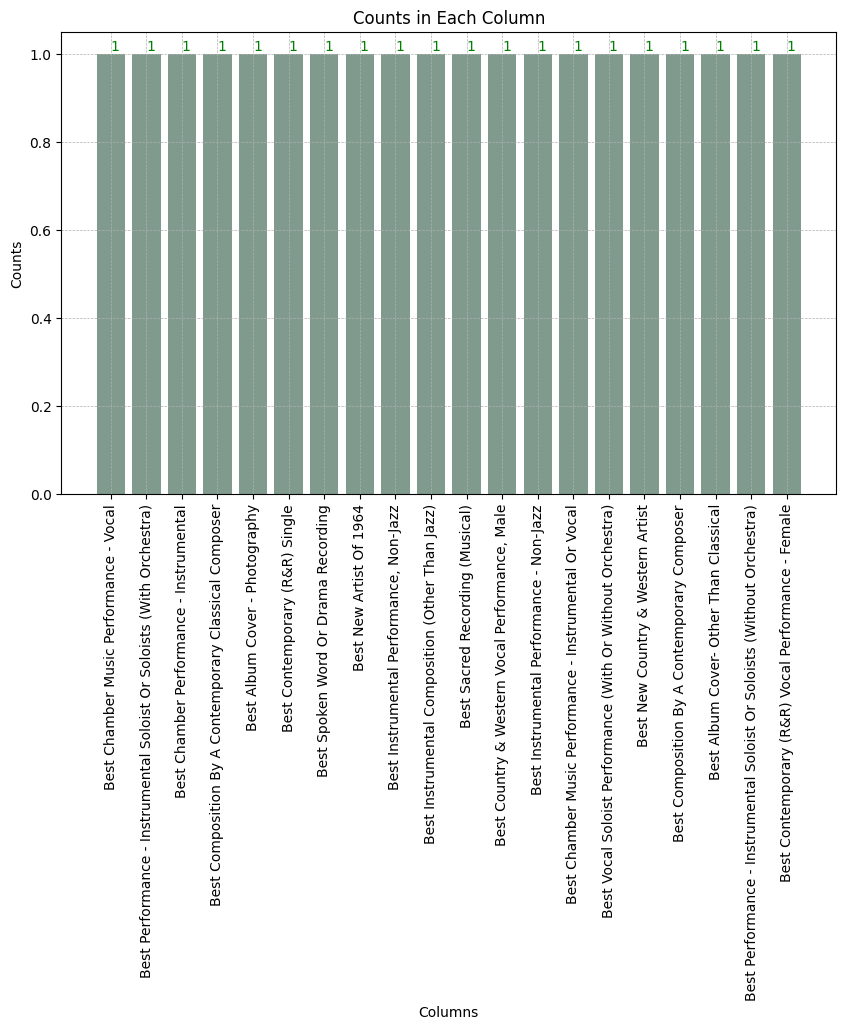

In [19]:
threshold = min_count + 1
filtered_categories = grammy_winners_df["category"].value_counts()
filtered_categories = filtered_categories[filtered_categories < threshold].head(20)
plot_counts(filtered_categories, len(covered_years), int(len(covered_years)/2 + 1))

In [20]:
max_category = grammy_winners_df["category"].value_counts().idxmax()

max_category_df = grammy_winners_df[grammy_winners_df["category"] == max_category]
yearly_counts = max_category_df.groupby('year').size().reset_index(name='count')

yearly_counts = yearly_counts.sort_values(by='year')


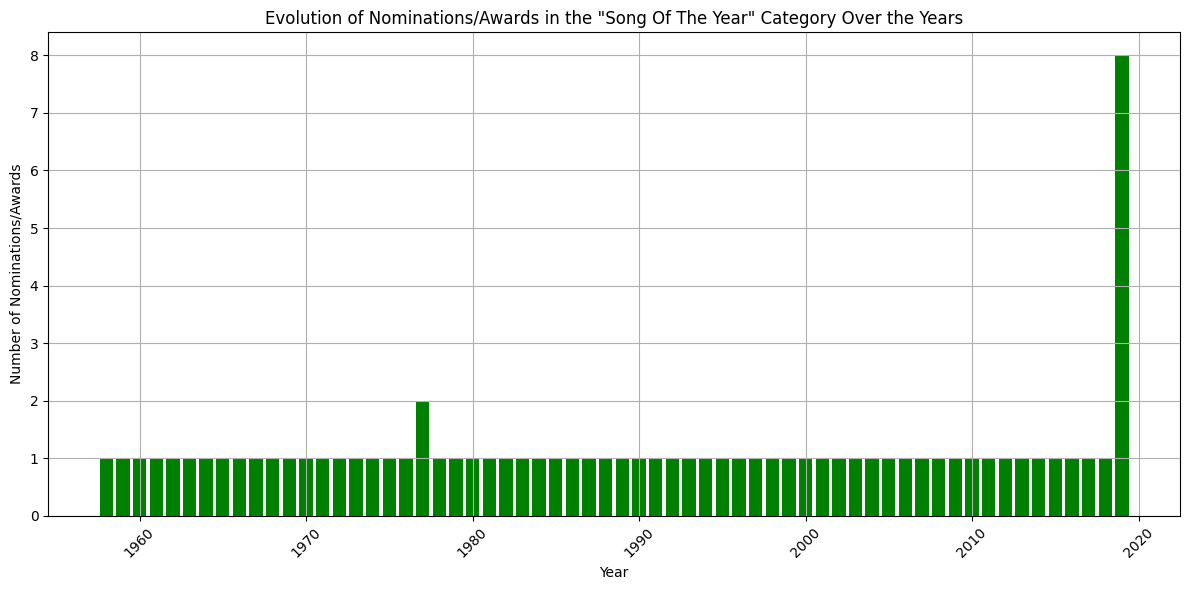

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts['year'], yearly_counts['count'], color=colors[0])
plt.title(f'Evolution of Nominations/Awards in the "{max_category}" Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Nominations/Awards')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
min_count = grammy_winners_df["category"].value_counts().min()

min_count_categories = grammy_winners_df["category"].value_counts()
min_count_categories = min_count_categories[min_count_categories == min_count]

min_count_df = grammy_winners_df[grammy_winners_df["category"].isin(min_count_categories.index)]
yearly_counts = min_count_df.groupby(['year', 'category']).size().reset_index(name='count')

yearly_counts = yearly_counts.sort_values(by=['year', 'category'])

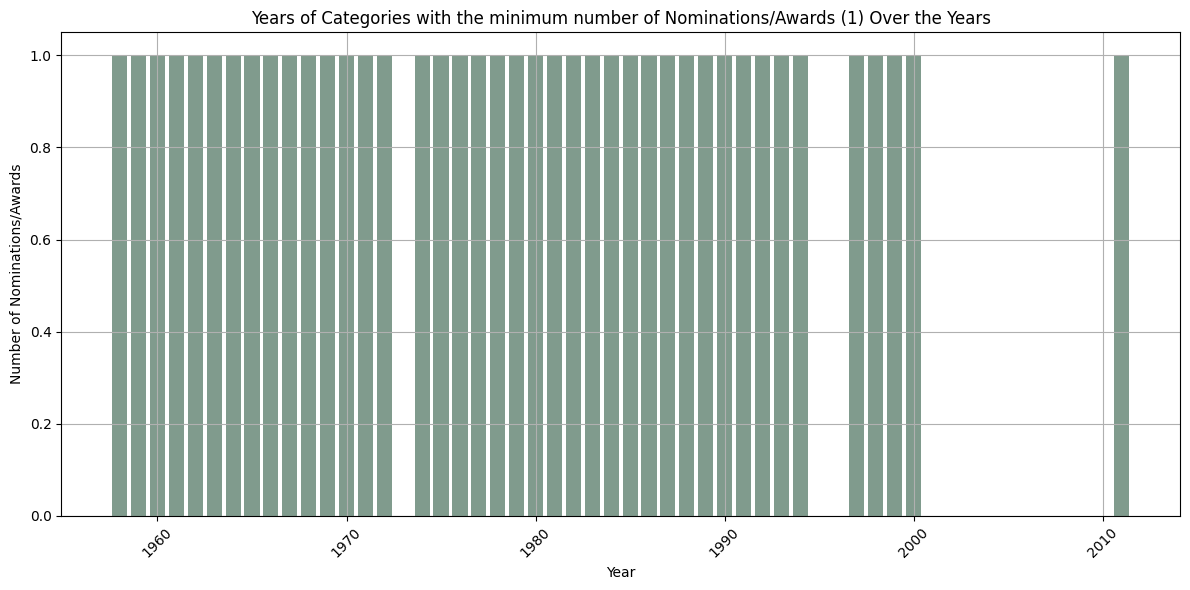

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts['year'], yearly_counts['count'], color=colors[len(colors)-1])
plt.title(f'Years of Categories with the minimum number of Nominations/Awards ({min_count}) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Nominations/Awards')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Nominee

Our main goal with this dataset is to help us get if a song has been nominated so we can remove any category where the nominee and the artist is the same.

In [24]:
grammy_winners_df["nominee"].value_counts().head(10)

nominee
Bridge Over Troubled Water    7
Berlioz: Requiem              7
Robert Woods                  7
Steven Epstein                7
David Frost                   6
Britten: War Requiem          6
A Taste Of Honey              6
Up, Up And Away               6
West Side Story               5
Blackstar                     5
Name: count, dtype: int64

In [25]:
same_nominee_artist_df = grammy_winners_df[grammy_winners_df["nominee"] == grammy_winners_df["artist"]]
same_nominee_artist_df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
116,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best R&B Album,Ella Mai,Ella Mai,None,https://www.grammy.com/sites/com/files/styles/...,True
266,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Folk Album,Patty Griffin,Patty Griffin,None,https://www.grammy.com/sites/com/files/styles/...,True
446,2018,61st Annual GRAMMY Awards (2018),2018-12-06T23:48:49-08:00,2019-09-10T01:06:11-07:00,Best Contemporary Instrumental Album,Steve Gadd Band,Steve Gadd Band,"Rich Breen, engineer/mixer",None,True
457,2018,61st Annual GRAMMY Awards (2018),2018-12-06T23:48:49-08:00,2019-09-10T01:06:11-07:00,Best R&B Album,H.E.R.,H.E.R.,"Darhyl ""DJ"" Camper, David ""Swagg R'Celius"" Har...",https://www.grammy.com/sites/com/files/styles/...,True
468,2018,61st Annual GRAMMY Awards (2018),2018-12-06T23:48:49-08:00,2019-09-10T01:06:11-07:00,Best New Age Album,Opium Moon,Opium Moon,"Opium Moon, producers; Lucas Fehring & Jeff Ga...",None,True


In [26]:
general_nominations = same_nominee_artist_df["category"].unique()
general_nominations

array(['Best R&B Album', 'Best Folk Album',
       'Best Contemporary Instrumental Album', 'Best New Age Album',
       'Best Bluegrass Album',
       'Best Latin Rock, Urban or Alternative Album', 'Best Reggae Album',
       'Best Alternative Music Album', 'Best Tropical Latin Album',
       'Best Electronic/Dance Album', 'Best Contemporary Jazz Album',
       'Best Southern, Country, Or Bluegrass Gospel Album',
       'Best Contemporary R&B Album',
       'Best Pop/Contemporary Gospel Album',
       'Best Mexican-American Music Performance',
       'Best Large Jazz Ensemble Performance', 'Best Rock Album',
       'Best Latin Pop Performance',
       'Best Mexican-American/Tejano Music Performance',
       'Best Metal Performance', 'Best New Age Performance',
       'Best Jazz Instrumental Performance, Group',
       'Best Contemporary Folk Recording',
       'Best Soul Gospel Performance By A Duo, Group, Choir Or Chorus',
       'Best Jazz Instrumental Performance, Big Band', 'Best N

In [27]:
songs_nominations = grammy_winners_df[~grammy_winners_df["category"].isin(same_nominee_artist_df["category"])]
songs_nominations.shape

(4223, 10)

In [28]:
songs_nominations["category"].value_counts()

category
Song Of The Year                                                   70
Record Of The Year                                                 69
Best Opera Recording                                               64
Best Album Notes                                                   63
Best Country Song                                                  55
                                                                   ..
Best Sacred Performance (Musical)                                   1
Best Jazz Performance - Small Group Or Soloist With Small Group     1
Best Jazz Performance - Large Group Or Soloist With Large Group     1
Best Contemporary Vocal Performance By A Group                      1
Best Classical Performance - Operatic Or Choral                     1
Name: count, Length: 603, dtype: int64

In [29]:
songs_nominations[songs_nominations["category"].isin(["Best Jazz Performance - Small Group Or Soloist With Small Group", "Best Contemporary Vocal Performance By A Group"])]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
4308,1970,13th Annual GRAMMY Awards (1970),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Best Jazz Performance - Small Group Or Soloist...,Alone,Bill Evans,None,https://www.grammy.com/sites/com/files/styles/...,True
4329,1969,12th Annual GRAMMY Awards (1969),2017-11-28T00:03:45-08:00,2019-09-10T01:06:11-07:00,Best Contemporary Vocal Performance By A Group,Aquarius/Let The Sunshine In (The Flesh Failures),5th Dimension,None,None,True


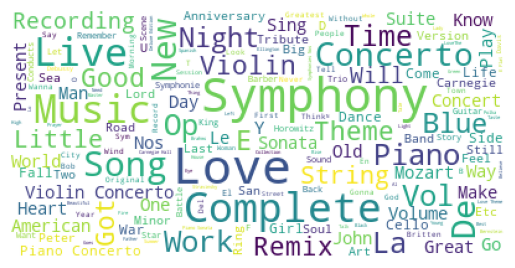

In [30]:
plot_word_cloud(grammy_winners_df, 'nominee')

##### Workers

Engineers, Produces, Songwriters and Symphony Orchestras are the workers more frequently mentioned in the nominations.

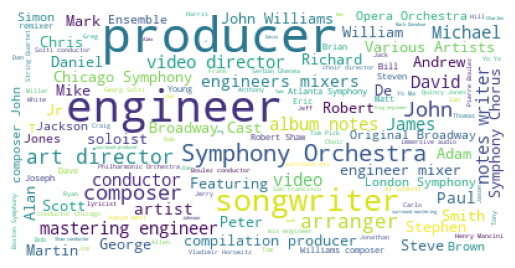

In [31]:
plot_word_cloud(grammy_winners_df, 'workers')

### Insights
One of the things with this dataset is that this version is faulty and don't provide more information than the nominees and the value it can provida could rely on what makes a song to be nominated to the awards, try to find patterns inside our Spotify dataset.

## EDA - Spotify Dataset

### Initial Review

In [32]:
print(f"We have a dataset with {start_bold}{spotify_df.shape[0]:,} entries{end_bold} with {start_bold}{spotify_df.shape[1]:,} columns{end_bold} Let's take a look at them")

We have a dataset with 114,000 entries with 21 columns Let's take a look at them


In [33]:
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


As initial view we see that Unnamed 0 is a numerical index that we could use as the real dataframe index we only need to add 1 because it starts from 0, also let's rename the index and drop those track_id and Unnamed columns.

In [34]:
spotify_df.index = spotify_df["Unnamed: 0"].map(lambda x: int(x)+1)
spotify_df = spotify_df.rename_axis("index")
spotify_df = spotify_df.drop(columns=["Unnamed: 0", "track_id"])
spotify_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
index,,,,,,,,,,,,,,,,,,,
1,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
2,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
3,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
4,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
5,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#### Duplicates

In [76]:
duplicates_by_column = spotify_df.duplicated()
duplicates_by_column.sum()

577

In [77]:
spotify_df = spotify_df.drop_duplicates(keep='first')
spotify_df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
index,,,,,,,,,,,,,,,,,,,
1,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,Do#,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
2,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,Do#,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
3,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,Do,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
4,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,Do,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
5,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,Re,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,Fa,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113997,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,Do,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113998,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,Do,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


In [81]:
print(f"We have a dataset with {start_bold}{spotify_df.shape[0]:,} entries{end_bold} with {start_bold}{spotify_df.shape[1]:,} columns{end_bold} Let's take a look to the empty values them.")

We have a dataset with 113,423 entries with 19 columns Let's take a look to the empty values them.


In [80]:
null_counts = spotify_df.isnull().sum()
print(null_counts)

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


We have 1 entry with track name empty, like our main goal depends on the name fiel we have to drop it, the other one with empty album does not matter too much as our main kay is the name.

In [82]:
spotify_df = spotify_df.dropna(subset=['track_name'])

In [85]:
print(f"Now, we have a dataset with {start_bold}{spotify_df.shape[0]:,} entries{end_bold} with {start_bold}{spotify_df.shape[1]:,} columns{end_bold} Let's explore them.")

Now, we have a dataset with 113,422 entries with 19 columns Let's explore them.


### Univariate Exploring

#### Categorical Data
For our data we have 4 categorical variables that provide the name of the album, the name of the artists the name of the song which is important because we will be merging the grammy dataset by searching the name of the song and also the track_genre we should take a look at this to know what we have.

##### track_genre

In [35]:
spotify_df["track_genre"].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [36]:
track_genre_counts = spotify_df["track_genre"].value_counts()

In [37]:
min_count_genre, max_count_genre = get_min_max_counts(track_genre_counts)

In [38]:
print(f"The track_genre presents an uniform distribution due that the category with the lowest number of songs has {start_bold}{track_genre_counts[min_count_genre]}{end_bold} songs,\nwhile the category with the greatest number has {start_bold}{track_genre_counts[max_count_genre]}{end_bold} songs.")

The track_genre presents an uniform distribution due that the category with the lowest number of songs has 1000 songs,
while the category with the greatest number has 1000 songs.


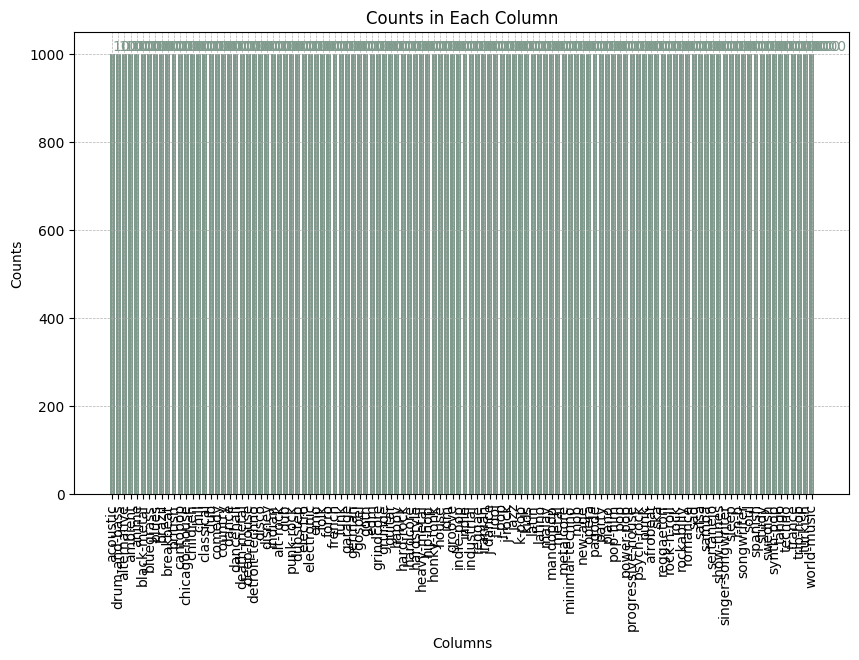

In [39]:
plot_counts(track_genre_counts, 999, 100)

#### Binary Data

**explicit** is our only binary attribute, let's check how the distribution plays out for the songs.

##### explicit

Most of the songs in the dataset are free of explicit content with a 91.4%, this could raise a question, **how many explicit songs have nominated to the Grammy**

In [40]:
spotify_df['explicit'].value_counts()

explicit
False    104253
True       9747
Name: count, dtype: int64

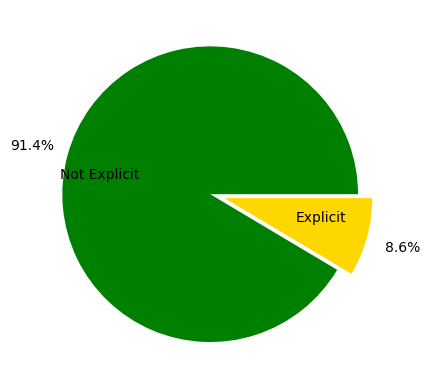

In [41]:
mapping = {0: 'Not Explicit', 1: 'Explicit'}
explicit_counts = spotify_df['explicit'].value_counts()
labels = [mapping[label] for label in explicit_counts.index.tolist()]

explode = (0, 0.10)
colors_theme = colors[0:len(labels)]

_, ax = plt.subplots()
ax.pie(explicit_counts, labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.5, explode=explode, colors=colors_theme)
plt.show()

#### Numerical Data

Most of the data is numerica let's try to make some sense on them:

In [42]:
number_features = spotify_df.select_dtypes(include=["int64", "float64"]).columns

In [43]:

print(f"""There is {start_bold}{len(number_features)}{end_bold} numerical features to review:
{newline.join([f"- {feature}" for feature in number_features])}
""")

There is 14 numerical features to review:
- popularity
- duration_ms
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- time_signature



As an initial view we see that the dataset give us a deep framework to understand the charateristics of the songs this along with our goal to detect whether a song is nominated to the Grammy we can see what are the patterns that could take a song to be nominated.

Let's try to group our features to see how closely related they are, let's check a correlation heatmap.

In [44]:
spotify_numerical_df = spotify_df[number_features]
spotify_numerical_df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
index,,,,,,,,,,,,,,
1,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
2,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
3,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
4,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
5,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [45]:
spotify_numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 1 to 114000
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   danceability      114000 non-null  float64
 3   energy            114000 non-null  float64
 4   key               114000 non-null  int64  
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


Good thing we don't have empty values in these features, the next thing we want to do is to see whether we can group these features, in our heatmap we see that:
* **Energy** and **Loudness** are fully correlated, indicating that the louder the song, the more energy it typically has.
* There is a moderate negative correlation between **Acousticness** and both **Energy** and **Loudness**, suggesting that the more acoustic a song is, the less energy it possesses or the quieter it tends to be.
* The other features show little correlation among themselves.

<Axes: >

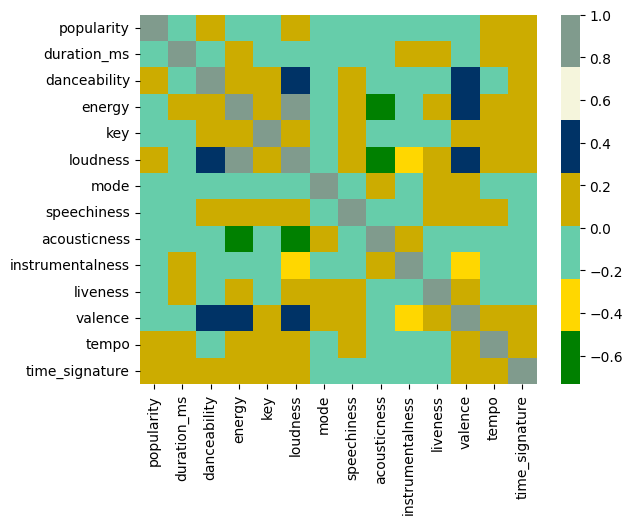

In [46]:
sns.heatmap(spotify_numerical_df.corr(), annot=False, fmt=".2f", cmap=colors)

In [47]:
spotify_numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


We also see that the numerical features are on different ranges that we should try to standardize

##### Popularity

The distribution of popularity scores is left-skewed, indicating most tracks have a moderate to high popularity, with a few outliers with very high scores.

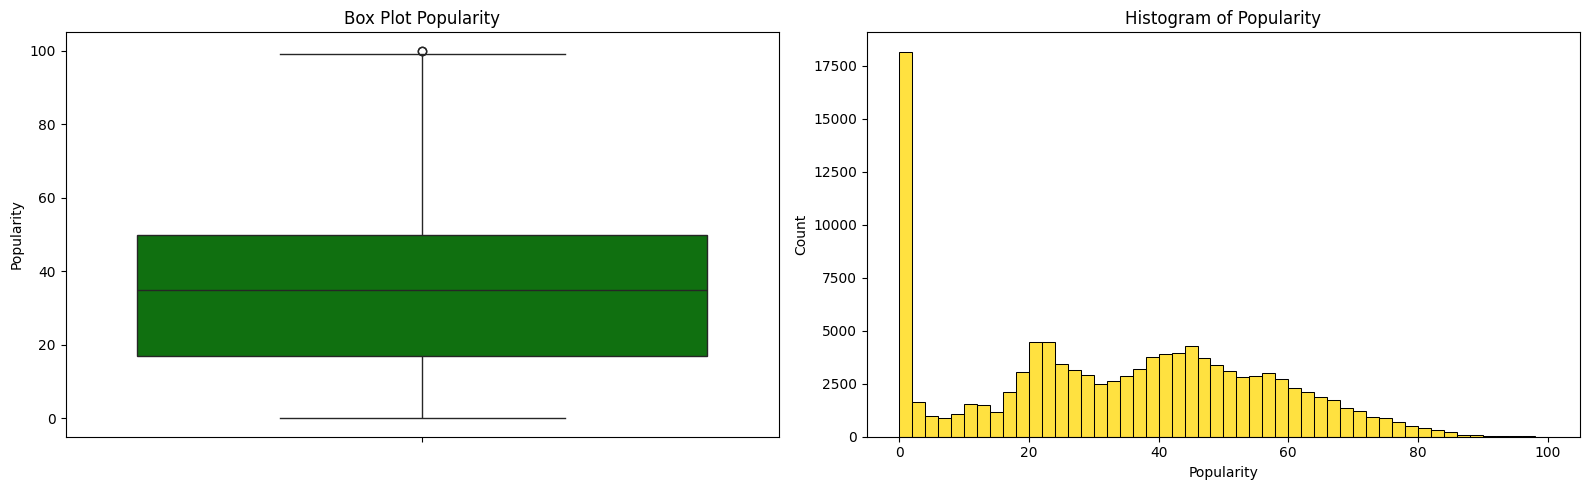

In [48]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['popularity'], ax=ax1, color=colors[0])
ax1.set_ylabel("Popularity")
ax1.set_title("Box Plot Popularity")

sns.histplot(spotify_numerical_df['popularity'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Popularity")
ax2.set_title("Histogram of Popularity")

plt.tight_layout()
plt.show()

##### Duration_ms

Most tracks have a relatively short duration, as seen by the steep drop-off in the histogram, and the boxplot suggests a median around 200,000 ms with some extreme outliers.

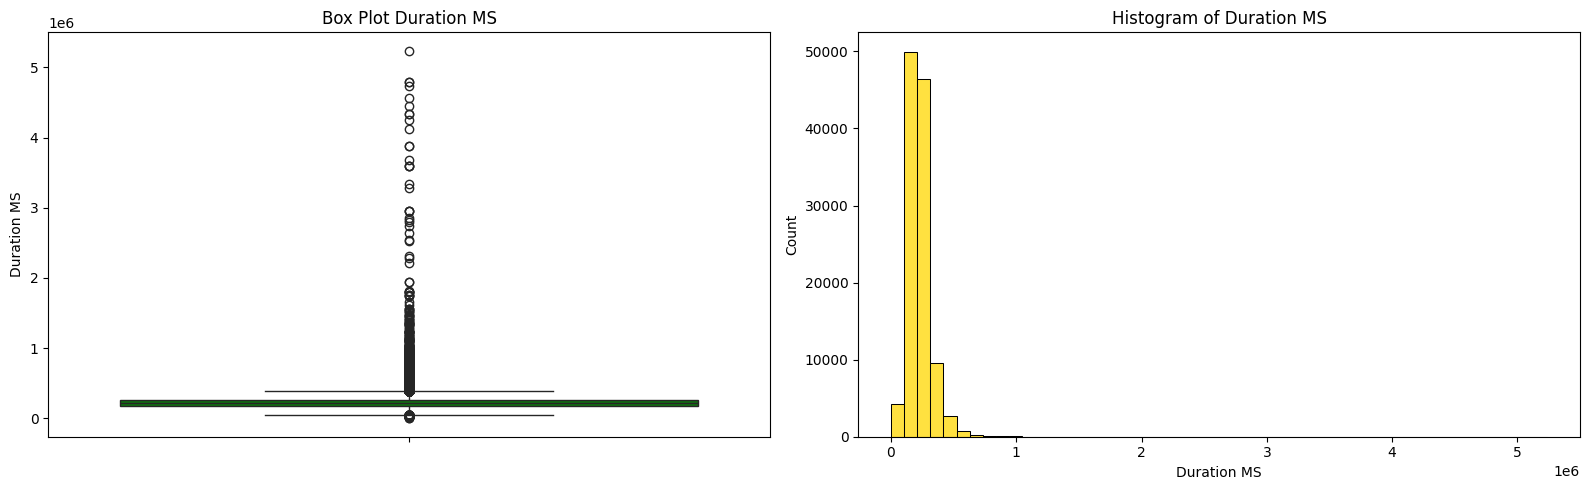

In [49]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['duration_ms'], ax=ax1, color=colors[0])
ax1.set_ylabel("Duration MS")
ax1.set_title("Box Plot Duration MS")

sns.histplot(spotify_numerical_df['duration_ms'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Duration MS")
ax2.set_title("Histogram of Duration MS")

plt.tight_layout()
plt.show()

##### Danceability

Danceability ratings are mostly centered around 0.5 to 0.7, implying a moderate to high tendency for tracks to be suitable for dancing, with few low outliers.

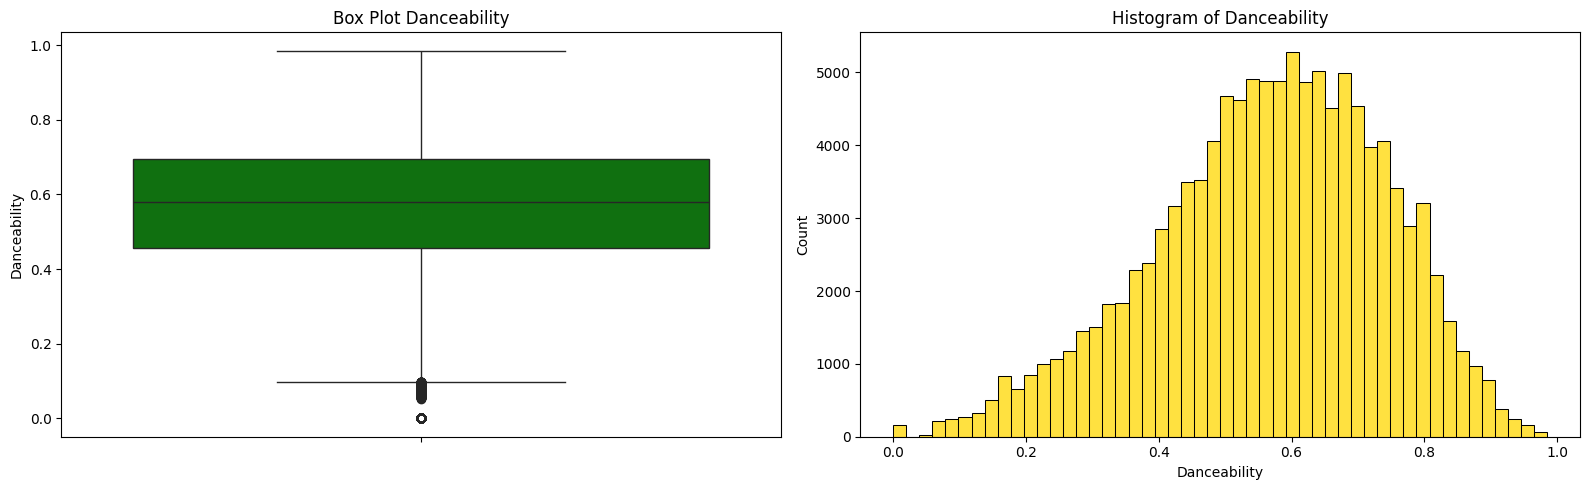

In [50]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['danceability'], ax=ax1, color=colors[0])
ax1.set_ylabel("Danceability")
ax1.set_title("Box Plot Danceability")

sns.histplot(spotify_numerical_df['danceability'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Danceability")
ax2.set_title("Histogram of Danceability")

plt.tight_layout()
plt.show()

##### Energy

Energy levels of tracks display a right-skewed distribution, indicating a prevalence of medium to high-energy tracks in the dataset.

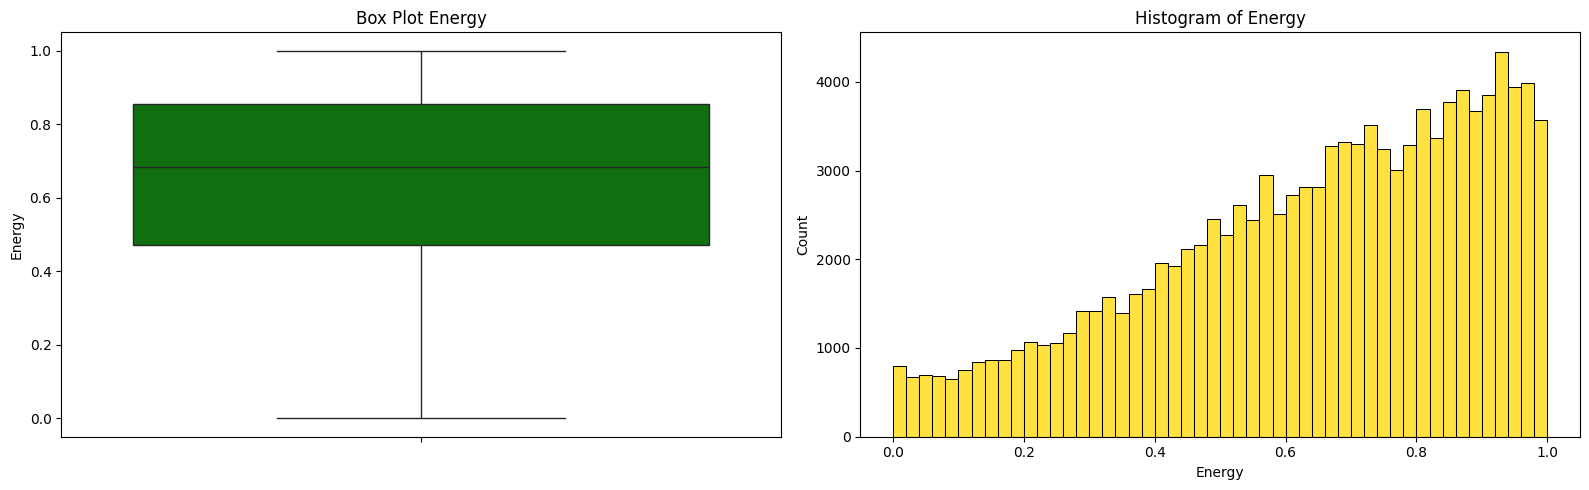

In [51]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['energy'], ax=ax1, color=colors[0])
ax1.set_ylabel("Energy")
ax1.set_title("Box Plot Energy")

sns.histplot(spotify_numerical_df['energy'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Energy")
ax2.set_title("Histogram of Energy")

plt.tight_layout()
plt.show()

##### Key
`Do, Do#, Re, Reb, Mi, Fa, Fa#, Sol, Sol#, La, Lab, Si.`

The key of the tracks is uniformly distributed across all keys with a slight preference for key 0 and key 7, which may correspond to Do and Fa#.




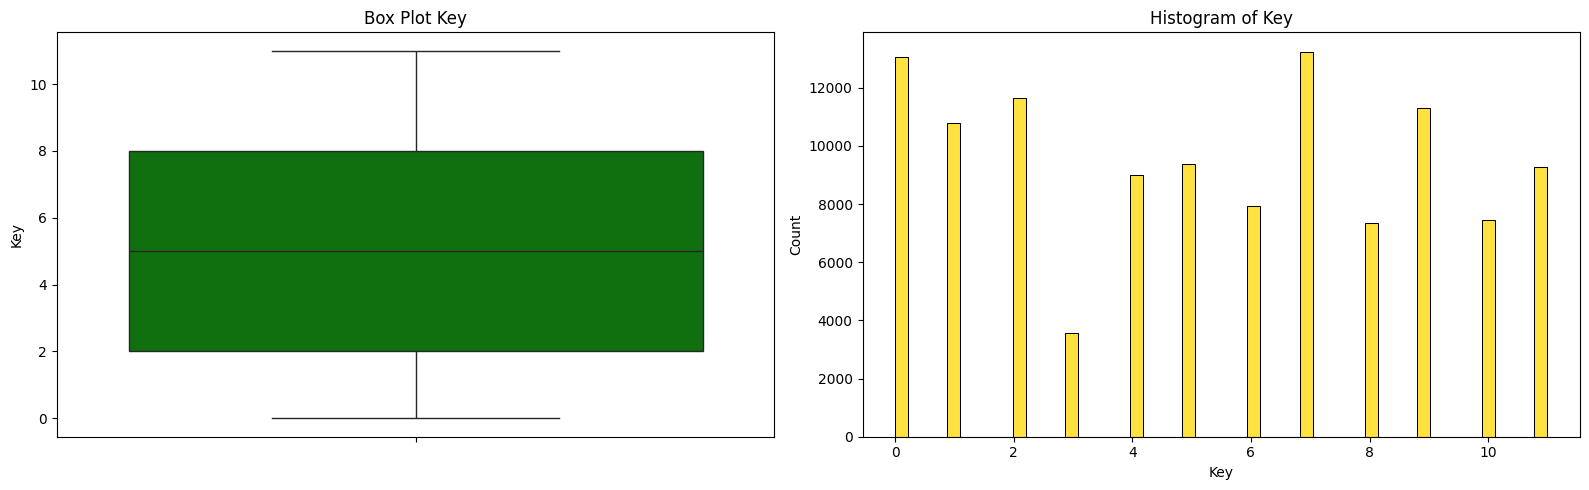

In [52]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['key'], ax=ax1, color=colors[0])
ax1.set_ylabel("Key")
ax1.set_title("Box Plot Key")

sns.histplot(spotify_numerical_df['key'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Key")
ax2.set_title("Histogram of Key")

plt.tight_layout()
plt.show()

##### Loudness

The loudness levels are concentrated between -10 and 0 dB, with the bulk of tracks having a loudness close to -5 dB, showing a preference for moderately loud music.


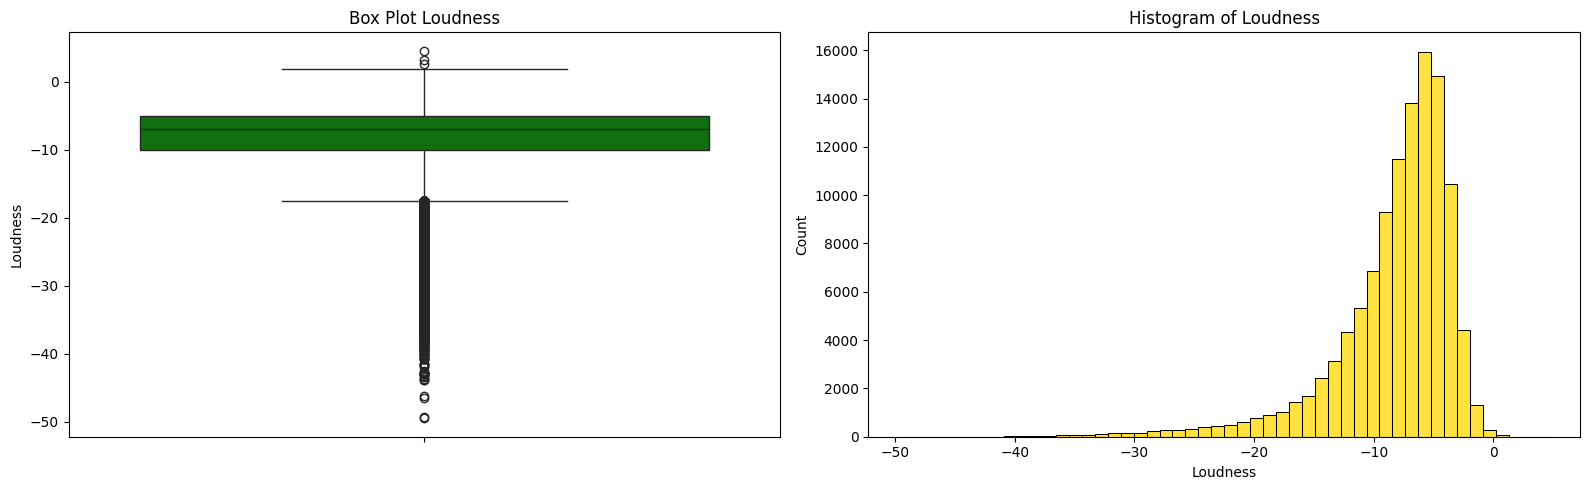

In [53]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['loudness'], ax=ax1, color=colors[0])
ax1.set_ylabel("Loudness")
ax1.set_title("Box Plot Loudness")

sns.histplot(spotify_numerical_df['loudness'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Loudness")
ax2.set_title("Histogram of Loudness")

plt.tight_layout()
plt.show()

##### Mode

Mode Looks like a binary field but it is a representation of the type of scale from which its melodic content is derived. of Major is represented by 1 and minor is 0, where the Major scale is being more represented in our dataset with a ~63%


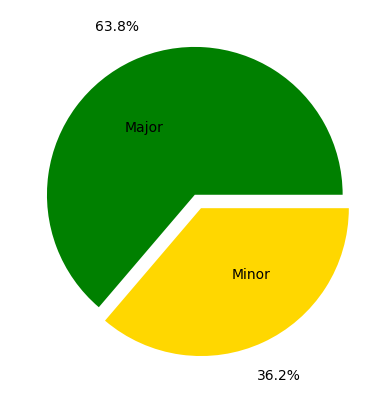

In [54]:
mapping = {0: 'Minor', 1: 'Major'}
explicit_counts = spotify_df['mode'].value_counts()
labels = [mapping[label] for label in explicit_counts.index.tolist()]

explode = (0, 0.10)
colors_theme = colors[0:len(labels)]

_, ax = plt.subplots()
ax.pie(explicit_counts, labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.5, explode=explode, colors=colors_theme)
plt.show()

##### Speechiness

Tracks generally have low speechiness with a peak close to 0, which suggests that most tracks are musical rather than spoken word.

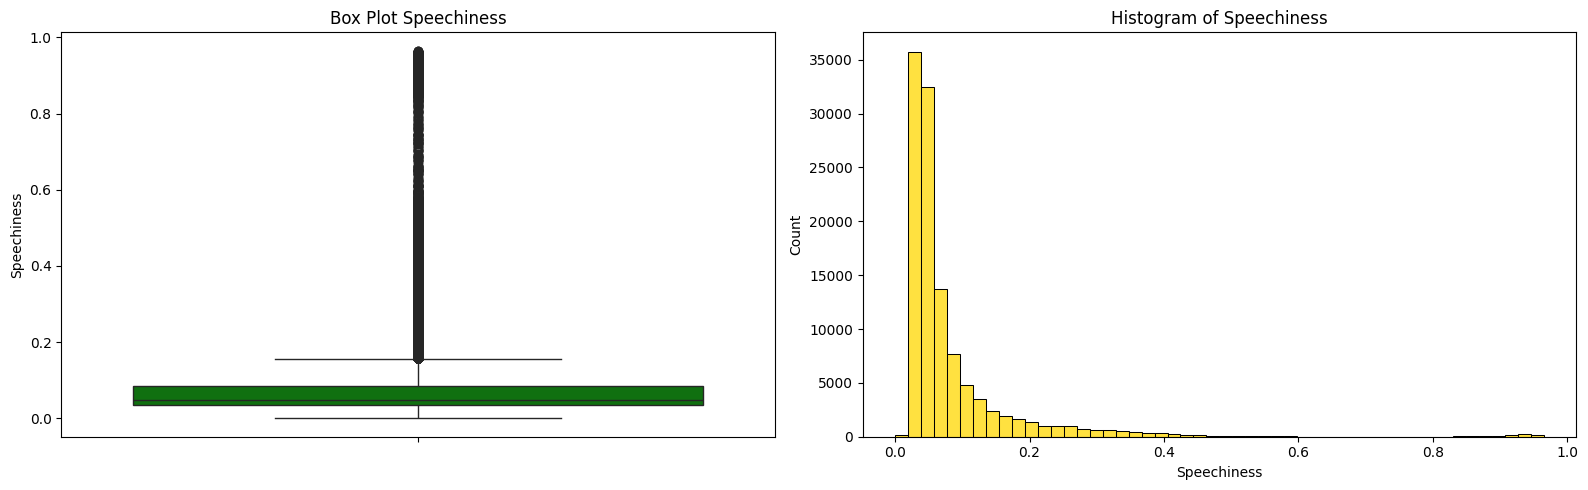

In [55]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['speechiness'], ax=ax1, color=colors[0])
ax1.set_ylabel("Speechiness")
ax1.set_title("Box Plot Speechiness")

sns.histplot(spotify_numerical_df['speechiness'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Speechiness")
ax2.set_title("Histogram of Speechiness")

plt.tight_layout()
plt.show()

##### Acousticness

A left-skewed distribution in acousticness shows that most tracks are not acoustic, with the majority having very low acousticness values.

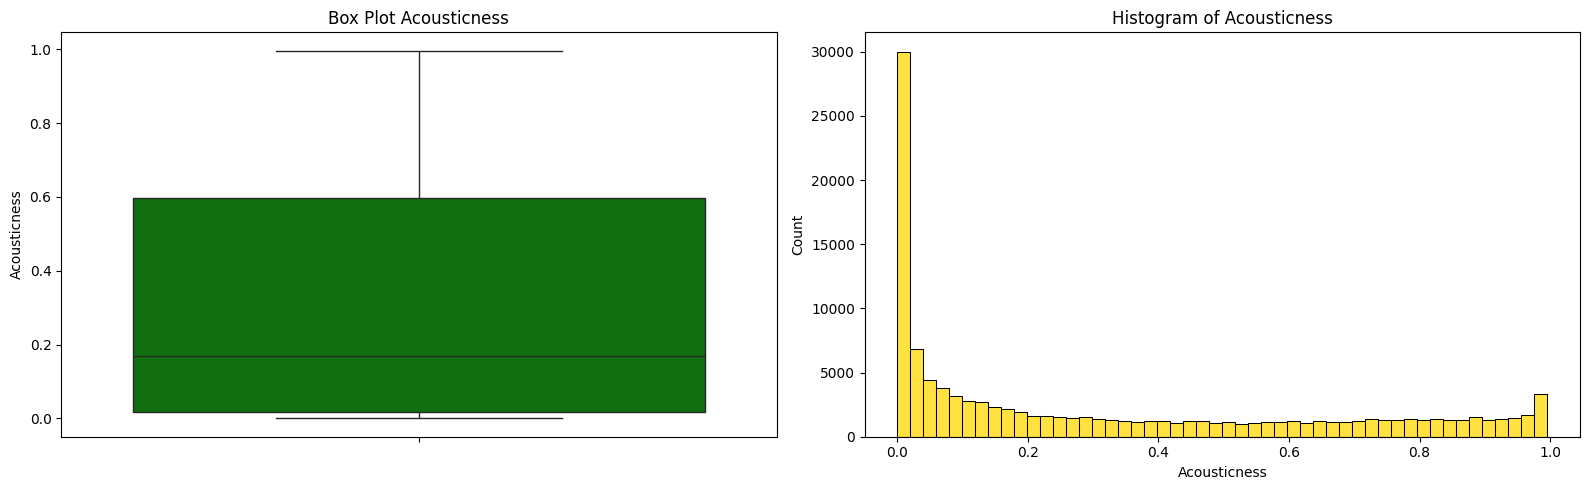

In [56]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['acousticness'], ax=ax1, color=colors[0])
ax1.set_ylabel("Acousticness")
ax1.set_title("Box Plot Acousticness")

sns.histplot(spotify_numerical_df['acousticness'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Acousticness")
ax2.set_title("Histogram of Acousticness")

plt.tight_layout()
plt.show()

##### Instrumentalness

Most tracks have very low instrumentalness, which indicates they likely contain vocal content, with a spike near 0 in the histogram.


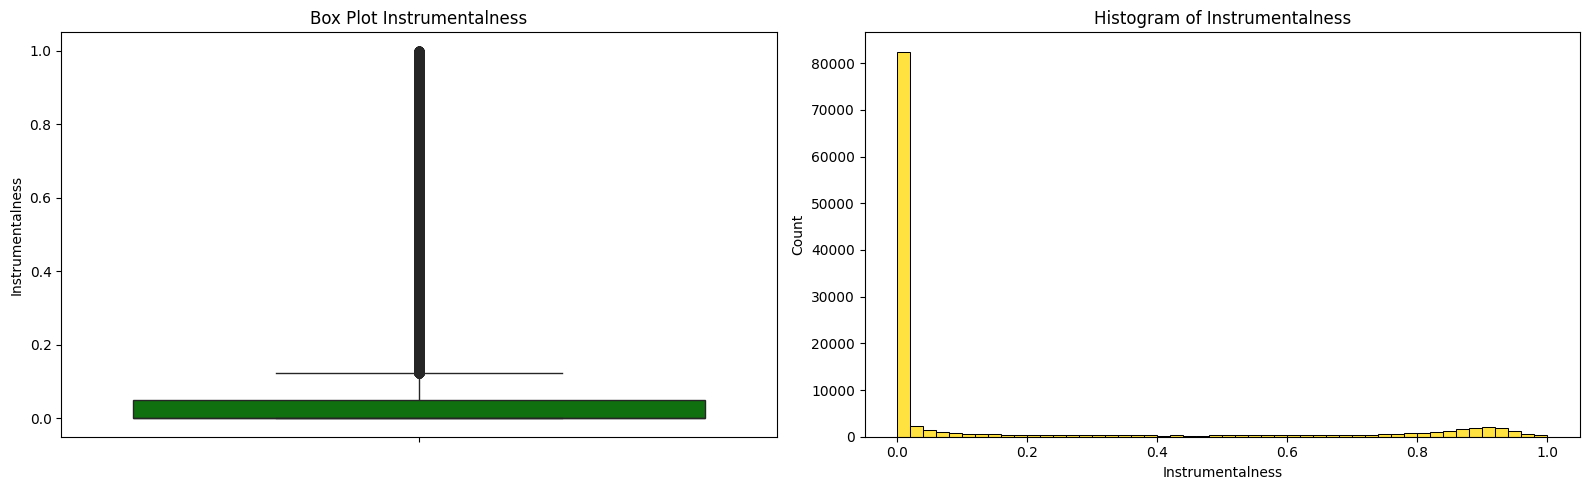

In [57]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['instrumentalness'], ax=ax1, color=colors[0])
ax1.set_ylabel("Instrumentalness")
ax1.set_title("Box Plot Instrumentalness")

sns.histplot(spotify_numerical_df['instrumentalness'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Instrumentalness")
ax2.set_title("Histogram of Instrumentalness")

plt.tight_layout()
plt.show()

##### Liveness

The distribution of liveness shows that live recordings are rare, with most tracks having a low liveness score.


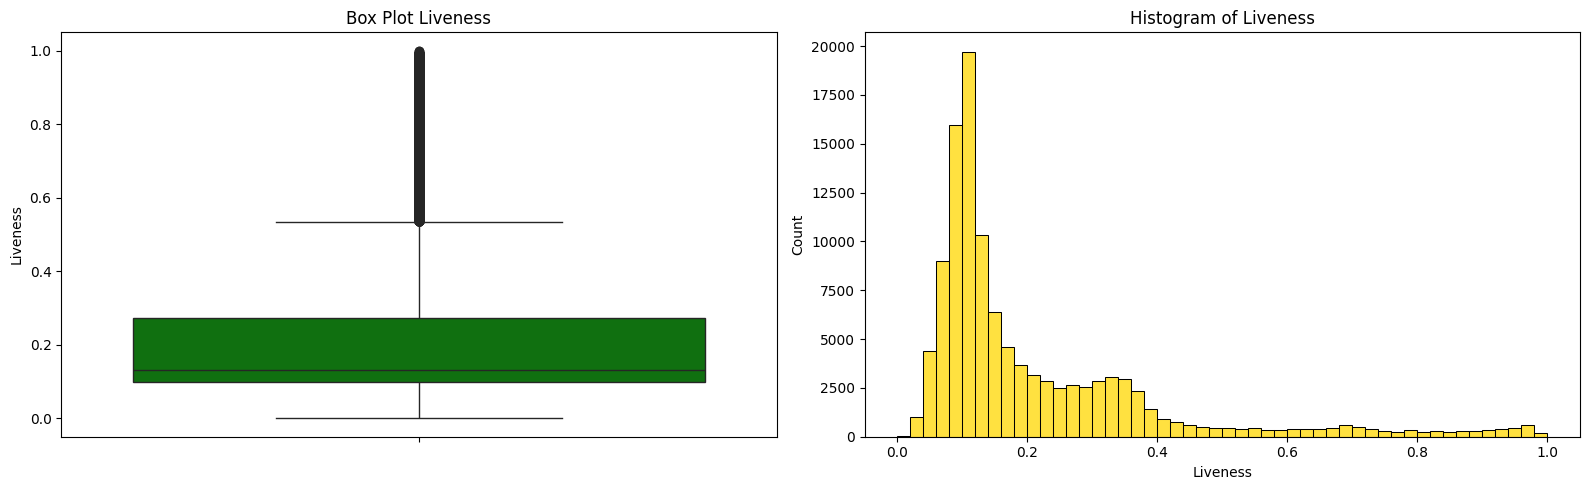

In [58]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['liveness'], ax=ax1, color=colors[0])
ax1.set_ylabel("Liveness")
ax1.set_title("Box Plot Liveness")

sns.histplot(spotify_numerical_df['liveness'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Liveness")
ax2.set_title("Histogram of Liveness")

plt.tight_layout()
plt.show()

##### Valence

Valence shows a wide range with a slight peak around 0.5, suggesting a balance in the dataset between tracks with positive and negative moods.

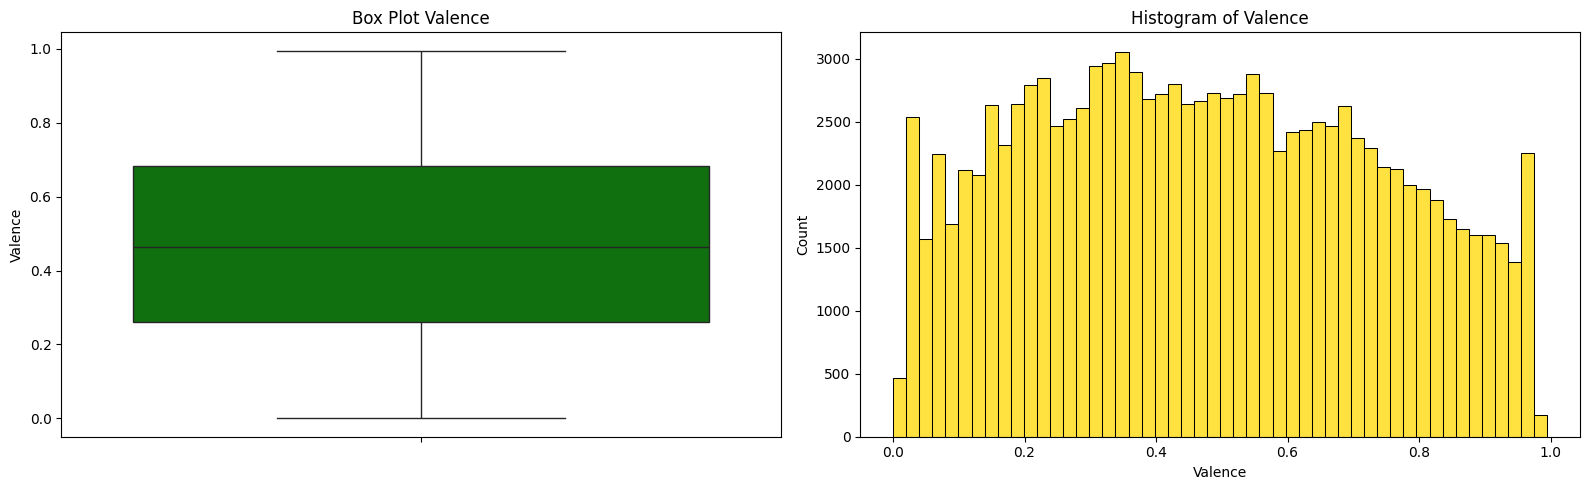

In [59]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['valence'], ax=ax1, color=colors[0])
ax1.set_ylabel("Valence")
ax1.set_title("Box Plot Valence")

sns.histplot(spotify_numerical_df['valence'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Valence")
ax2.set_title("Histogram of Valence")

plt.tight_layout()
plt.show()

##### Tempo

There's a concentration of tracks around the 120 BPM mark, common for pop and dance music, with a broad range of tempos present.


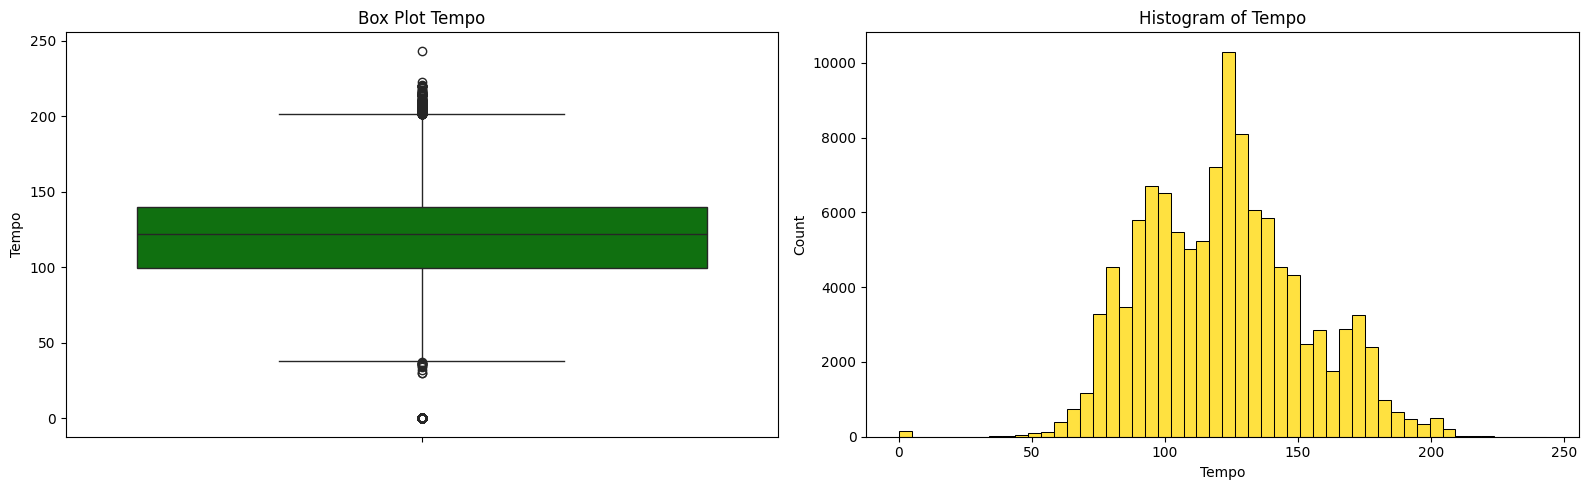

In [60]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['tempo'], ax=ax1, color=colors[0])
ax1.set_ylabel("Tempo")
ax1.set_title("Box Plot Tempo")

sns.histplot(spotify_numerical_df['tempo'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Tempo")
ax2.set_title("Histogram of Tempo")

plt.tight_layout()
plt.show()

##### Time Signature

Nearly all tracks have a 4/4 time signature, which is standard for most modern music, with very few deviations.


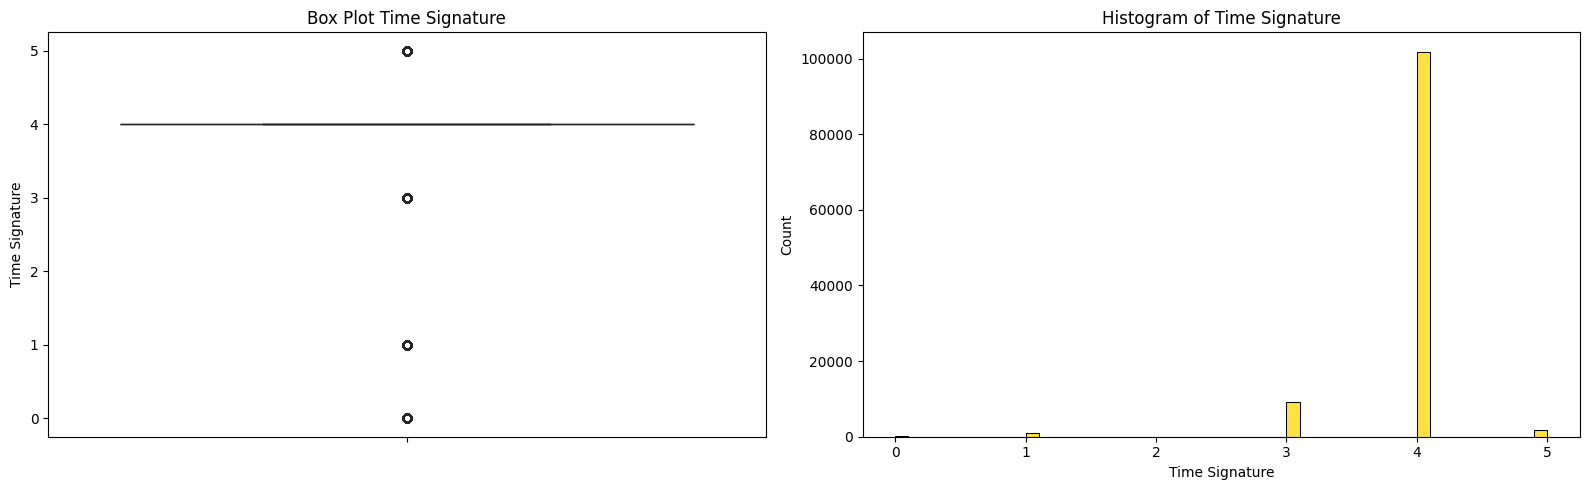

In [61]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.boxplot(spotify_numerical_df['time_signature'], ax=ax1, color=colors[0])
ax1.set_ylabel("Time Signature")
ax1.set_title("Box Plot Time Signature")

sns.histplot(spotify_numerical_df['time_signature'], bins=50, ax=ax2, color=colors[1])
ax2.set_xlabel("Time Signature")
ax2.set_title("Histogram of Time Signature")

plt.tight_layout()
plt.show()

### Bivariate and Multivariate Exploring

In the process of evaluating our single attributes some questions were raised that we could try to answer using two or more variables.


#### Is there a relationship between valence and danceability of tracks?

Looks like there is a slight positive correlation between valence and danceability, with higher danceability associated with more positive or happier-sounding tracks.

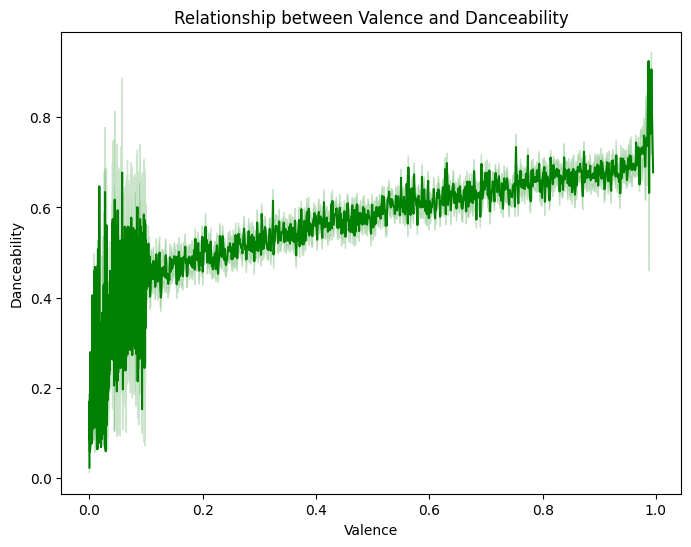

In [62]:
plt.figure(figsize=(8,6))
sns.lineplot(x='valence', y='danceability', data=spotify_df, color=colors[0])
plt.title('Relationship between Valence and Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.show()

#### How does energy relate to loudness

Louder tracks typically have more energy

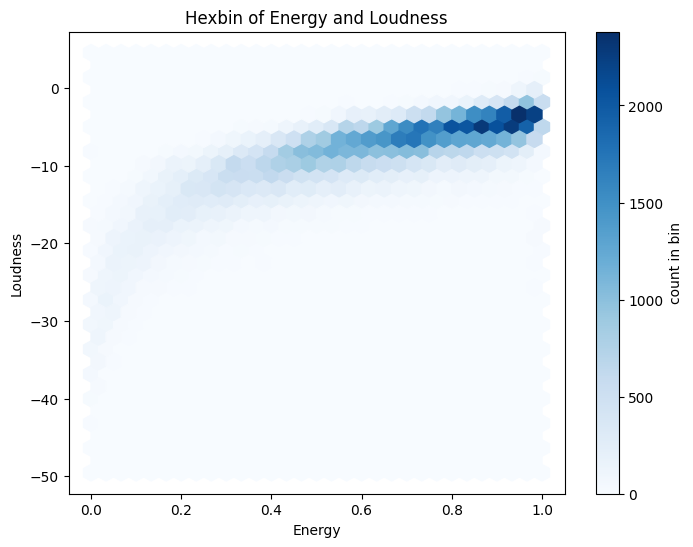

In [63]:
plt.figure(figsize=(8,6))
plt.hexbin(spotify_df['energy'], spotify_df['loudness'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
plt.title('Hexbin of Energy and Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

#### Does tempo affect the duration of tracks?

The track length varies independently of tempo.

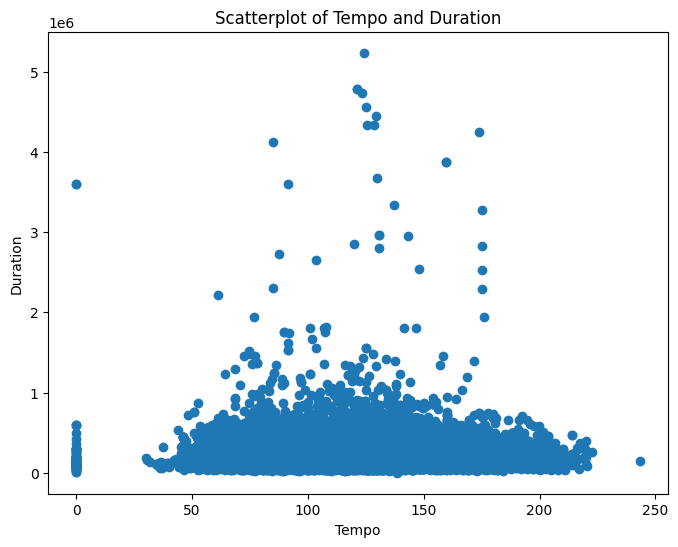

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(spotify_df['tempo'], spotify_df['duration_ms'])
plt.title('Scatterplot of Tempo and Duration')
plt.xlabel('Tempo')
plt.ylabel('Duration')
plt.show()

#### Do tracks with higher acousticness also feature lower energy?

Tracks with higher acousticness tend to have lower energy

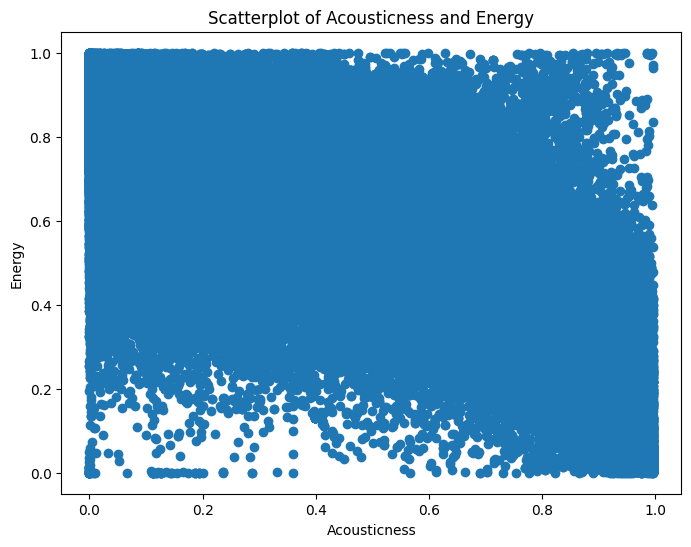

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(spotify_df['acousticness'], spotify_df['energy'])
plt.title('Scatterplot of Acousticness and Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

#### How does tempo relate to the key of tracks?

Tempo does seem to be independent on the key of the track, as the distribution of tempos across keys is fairly consistent.

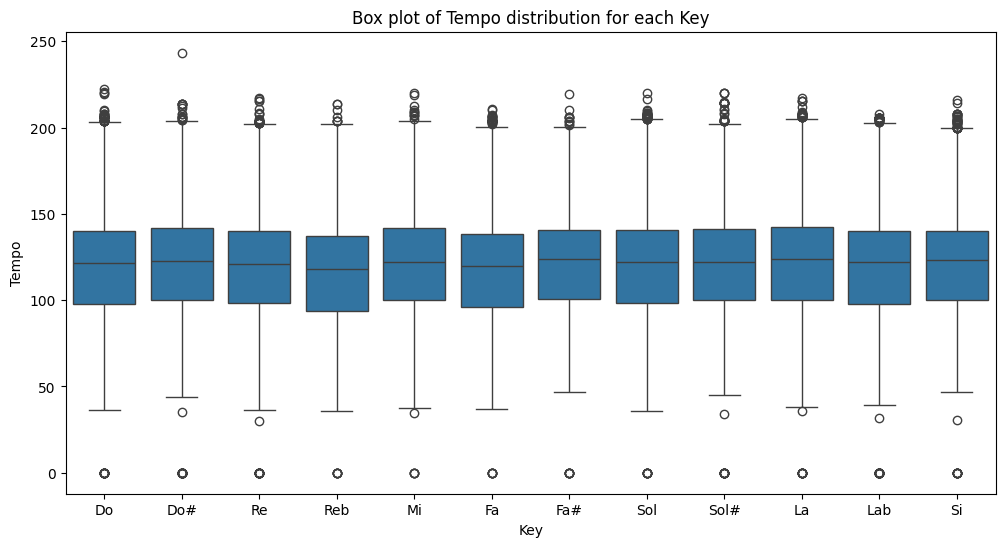

In [66]:
key_mapping = {0: 'Do', 1: 'Do#', 2: 'Re', 3: 'Reb', 4: 'Mi', 5: 'Fa', 6: 'Fa#', 7: 'Sol', 8: 'Sol#', 9: 'La', 10: 'Lab', 11: 'Si'}
spotify_df['key'] = spotify_df['key'].map(key_mapping)



plt.figure(figsize=(12,6))
sns.boxplot(x='key', y='tempo', data=spotify_df, order=list(key_mapping.values()))
plt.title('Box plot of Tempo distribution for each Key')
plt.xlabel('Key')
plt.ylabel('Tempo')
plt.show()

#### Question: How does the distribution of musical keys vary across different genres?

The diversity in key preference across genres could be influenced by traditional tonalities and the mood or style associated with each genre

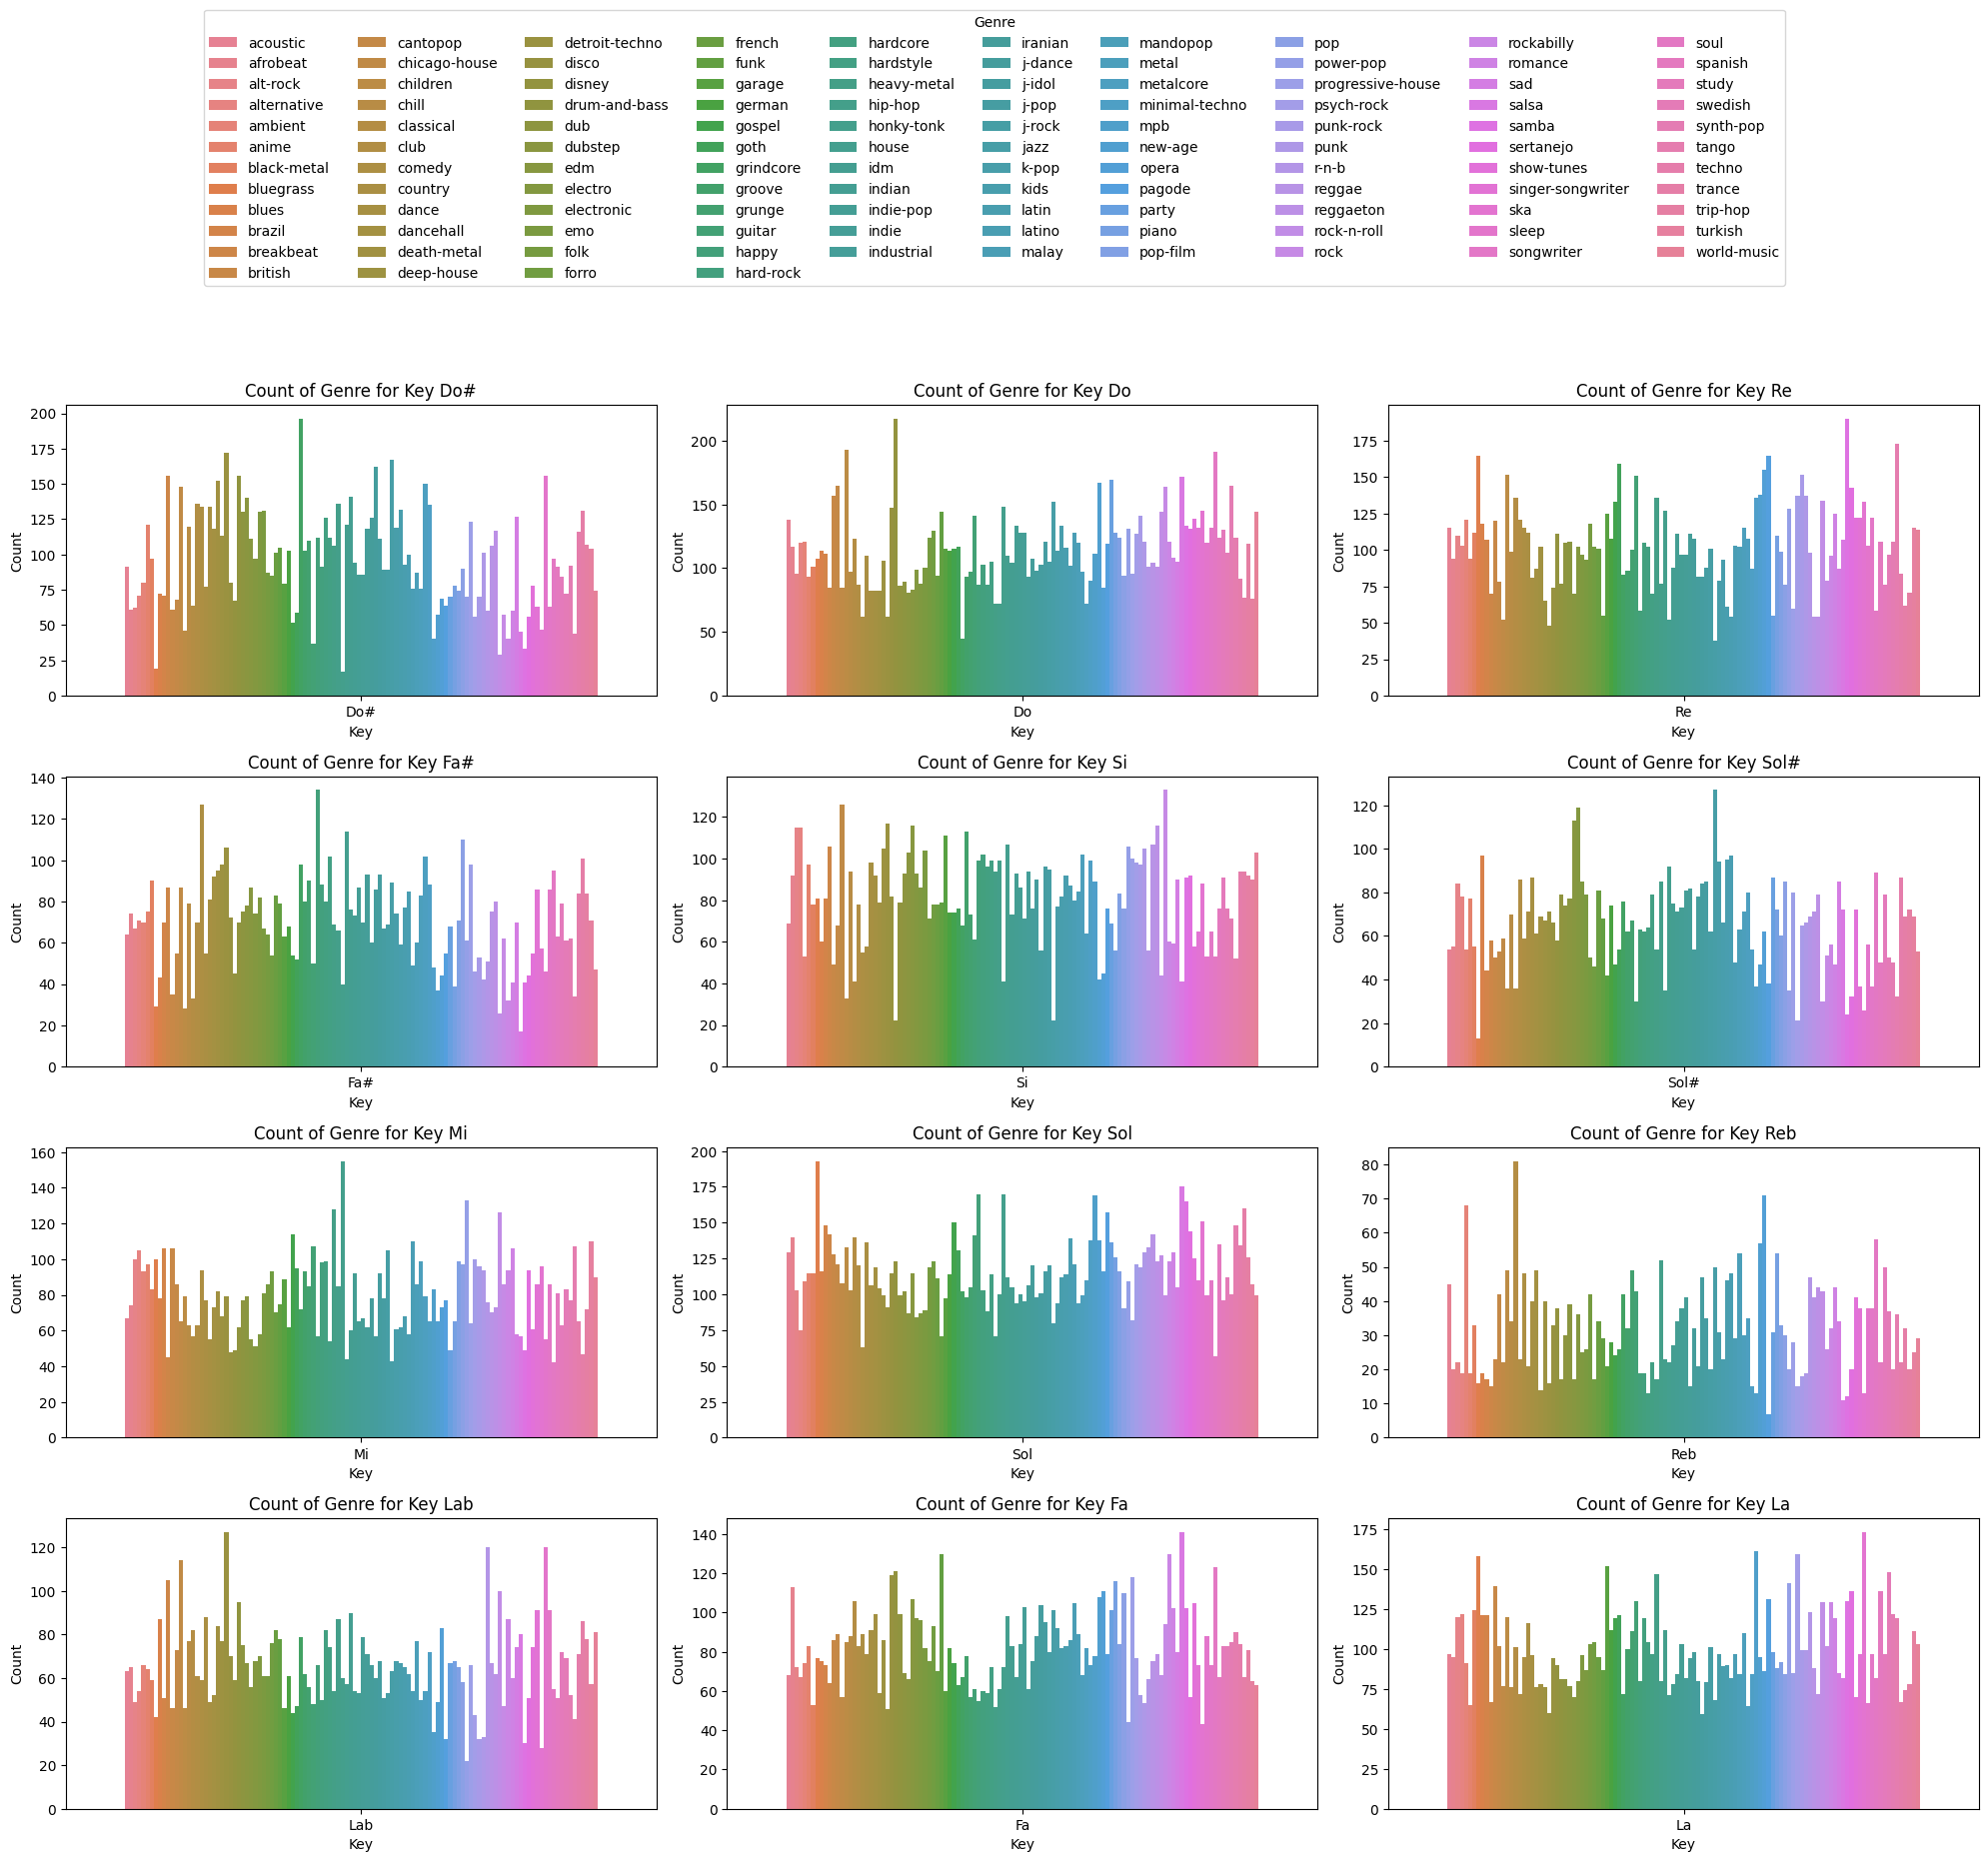

In [75]:
unique_keys = spotify_df['key'].unique()

fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.ravel()

for i, key in enumerate(unique_keys):
    filtered_df = spotify_df[spotify_df['key'] == key]
    sns.countplot(x='key', hue='track_genre', data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Count of Genre for Key {key}')
    axs[i].set_xlabel('Key')
    axs[i].set_ylabel('Count')
    axs[i].get_legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Genre', bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=10)

plt.tight_layout()
plt.show()

### Insights

* There is a small trend where tracks with higher valence, which are associated with a positive mood, also tend to have higher danceability. This suggests that happier songs are often more danceable.
* There's a strong relationship between loudness and energy. Tracks with higher energy also tend to be louder, which often means dynamic and intensen.
* Between the tempo and duration there is no indication of a clear trend linking the two, suggesting that song length is not necessarily dependent on how fast or slow the track is.
* Songs with high acousticness typically have lower energy levels, indicating a divide between acoustic and more electronic, high-energy music.
* There is no significant preference for tempo within specific keys, pointing to a diversity of musical expression across different keys.

### Transformation

#### tempo_category

To make it more interpretable, binned in these: Slow, Moderate, Fast, Very Fast

/tmp/ipykernel_285/987152861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['tempo_category'] = pd.cut(spotify_df['tempo'], bins=bin_edges, labels=bin_labels, include_lowest=True)


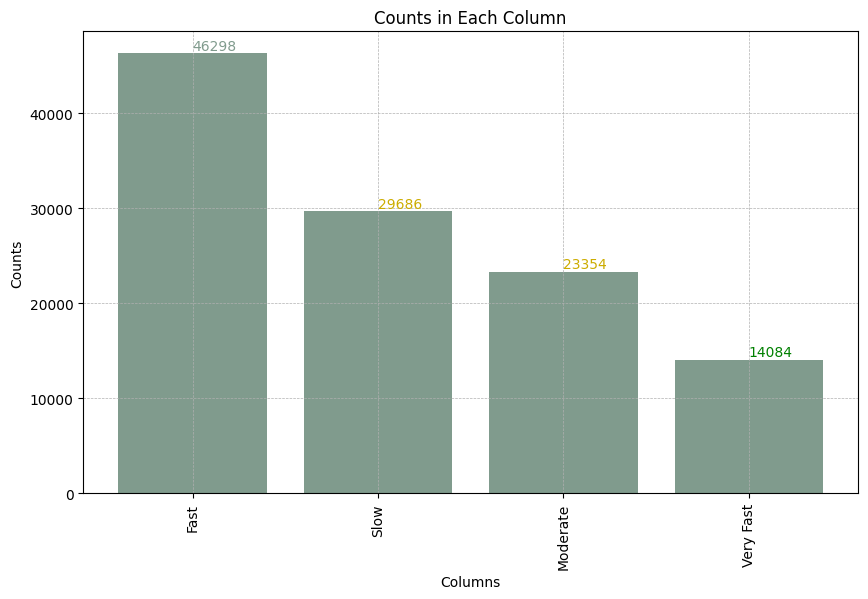

In [89]:
bin_edges = [spotify_df['tempo'].min(), 100, 120, 160, spotify_df['tempo'].max()]
bin_labels = ['Slow', 'Moderate', 'Fast', 'Very Fast']

spotify_df['tempo_category'] = pd.cut(spotify_df['tempo'], bins=bin_edges, labels=bin_labels, include_lowest=True)
plot_counts(spotify_df['tempo_category'].value_counts(), 40000, 20000)

##### mood

The valence give us the musical positiviness along with the energy we can calculate the moods for the track in a more interpretable manner.

In [91]:
valence_median = spotify_df['valence'].median()
energy_median = spotify_df['energy'].median()

/tmp/ipykernel_285/2701915728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['mood'] = np.select(


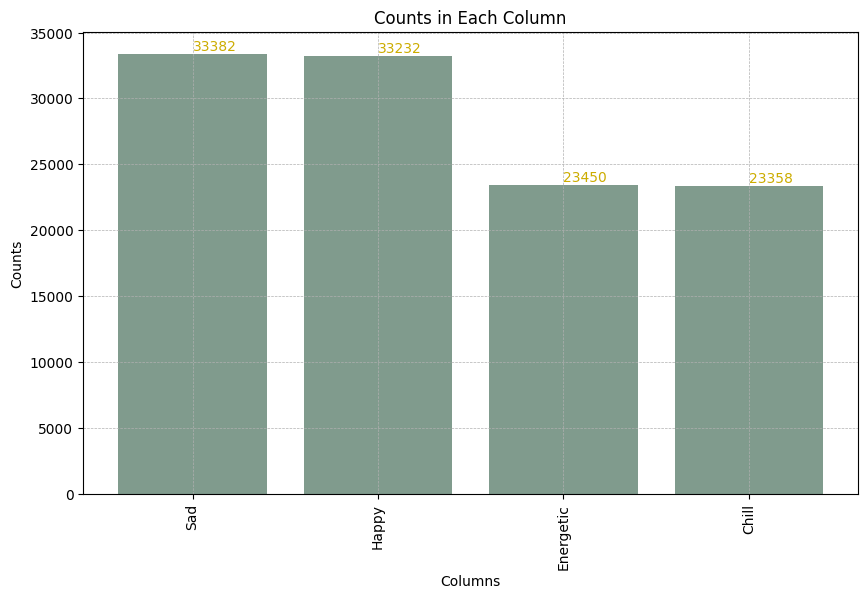

In [93]:
spotify_df['mood'] = np.select(
    [
        (spotify_df['valence'] > valence_median) & (spotify_df['energy'] > energy_median),
        (spotify_df['valence'] <= valence_median) & (spotify_df['energy'] <= energy_median),
        (spotify_df['valence'] <= valence_median) & (spotify_df['energy'] > energy_median),
        (spotify_df['valence'] > valence_median) & (spotify_df['energy'] <= energy_median)
    ], 
    [
        'Happy', 
        'Sad', 
        'Energetic', 
        'Chill'
    ], 
    default='Neutral'
)
plot_counts(spotify_df['mood'].value_counts(), 40000, 20000)

##### energy_dance_index

We can join the danceability and the energy of a song in order to indicate potential hits

/tmp/ipykernel_285/663399561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['energy_dance_index'] = spotify_df['danceability'] * spotify_df['energy']


<Axes: ylabel='Frequency'>

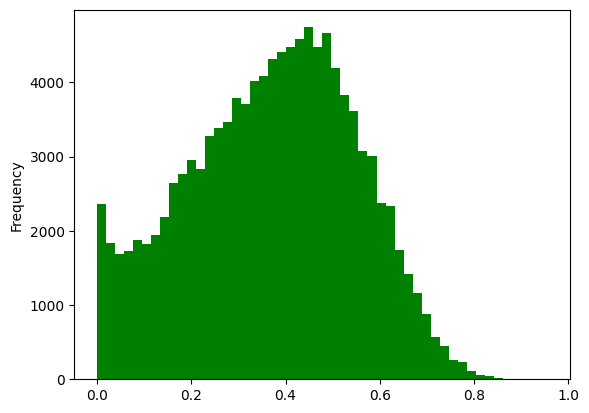

In [95]:
spotify_df['energy_dance_index'] = spotify_df['danceability'] * spotify_df['energy']
spotify_df['energy_dance_index'].plot(kind='hist', bins=50, color=colors[0])

##### popularity_index

Binned in Low, Medium, High for easier analysis.

/tmp/ipykernel_285/4284754338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['popularity_index'] = pd.cut(spotify_df['popularity'], bins=bin_edges, labels=bin_labels, include_lowest=True)


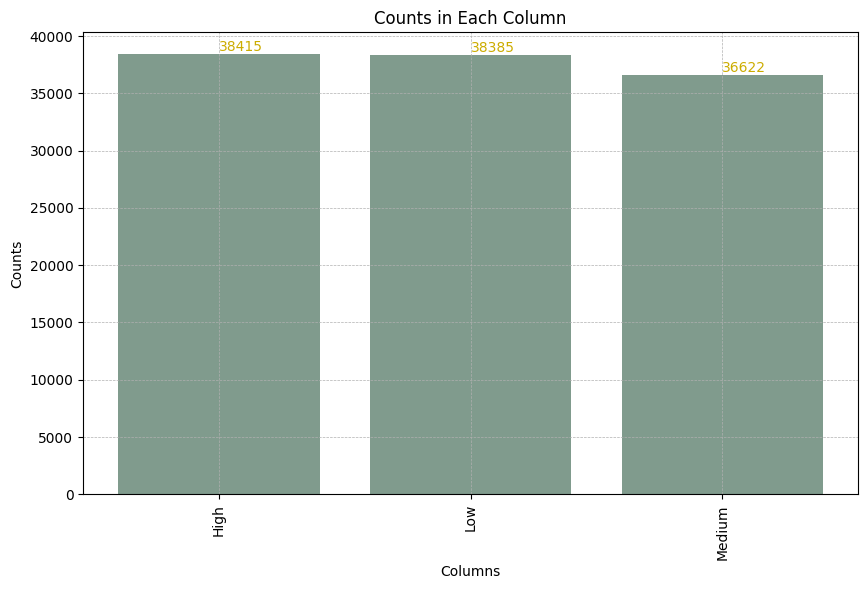

In [99]:
bin_edges = [spotify_df['popularity'].min(), spotify_df['popularity'].quantile(0.33), spotify_df['popularity'].quantile(0.66), spotify_df['popularity'].max()]
bin_labels = ['Low', 'Medium', 'High']

spotify_df['popularity_index'] = pd.cut(spotify_df['popularity'], bins=bin_edges, labels=bin_labels, include_lowest=True)
plot_counts(spotify_df['popularity_index'].value_counts(), 40000, 20000)

##### performance

Give meaning to the performance indicator. Binned between Live performance and Studio Recorded

/tmp/ipykernel_285/8738863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['performance'] = np.where(spotify_df['liveness'] > 0.8, 'Live Performance', 'Studio Recorded')


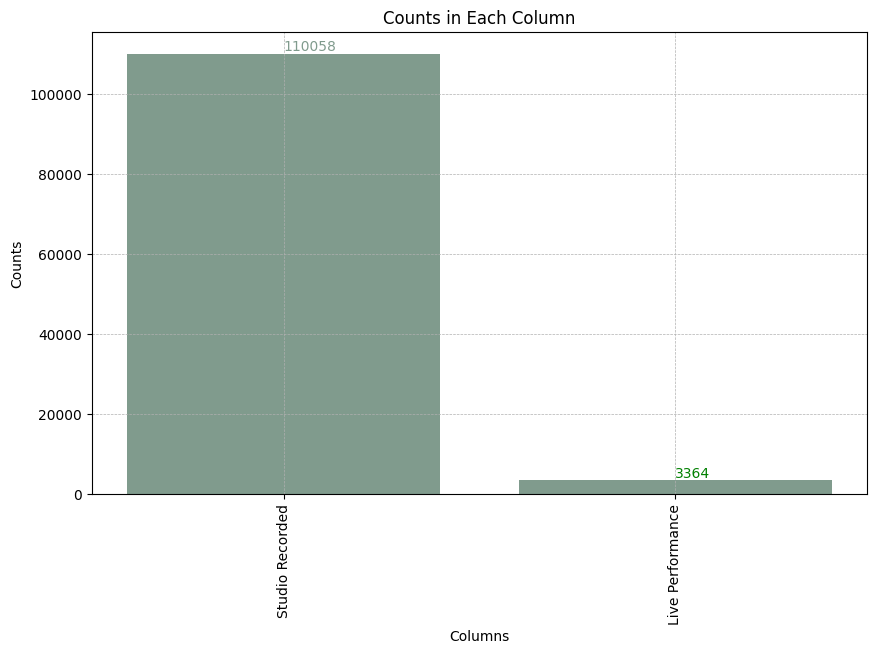

In [98]:
spotify_df['performance'] = np.where(spotify_df['liveness'] > 0.8, 'Live Performance', 'Studio Recorded')
plot_counts(spotify_df['performance'].value_counts(), 40000, 20000)